# Chaper 2 - N-armed Bandits

## Finding the best actions given the expected rewards
- (Listing 2.1)

In [3]:
def get_best_action(actions):
	best_action = 0
	max_action_value = 0
	for i in range(len(actions)): #A 
		cur_action_value = get_action_value(actions[i]) #B
		if cur_action_value > max_action_value:
			best_action = i
			max_action_value = cur_action_value
	return best_action

## epsilon-greedy strategy
- Listings 2.2-2.6

In [4]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

n = 10
probs = np.random.rand(n) #A
eps = 0.1

In [5]:
def get_reward(prob, n=10):
    reward = 0;
    for i in range(n):
        if random.random() < prob:
            reward += 1
    return reward

In [6]:
reward_test = [get_reward(0.7) for _ in range(2000)]

In [7]:
np.mean(reward_test)

6.997

In [8]:
sum = 0
x = [4,5,6,7]
for j in range(len(x)): 
	sum = sum + x[j]
sum

22

(array([  3.,  18.,  69., 209., 406., 529., 489., 208.,  69.]),
 array([ 2.        ,  2.88888889,  3.77777778,  4.66666667,  5.55555556,
         6.44444444,  7.33333333,  8.22222222,  9.11111111, 10.        ]),
 <a list of 9 Patch objects>)

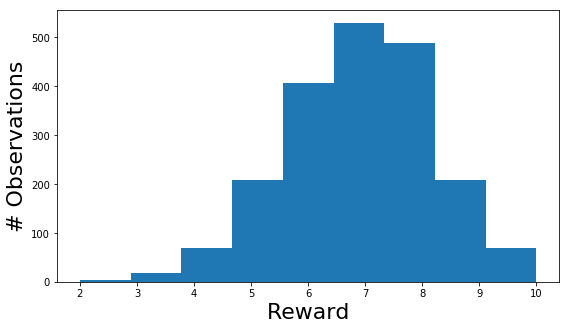

In [9]:
plt.figure(figsize=(9,5))
plt.xlabel("Reward",fontsize=22)
plt.ylabel("# Observations",fontsize=22)
plt.hist(reward_test,bins=9)

##### Listing 2.4

In [10]:
# 10 actions x 2 columns
# Columns: Count #, Avg Reward
record = np.zeros((n,2))

In [11]:
def get_best_arm(record):
    arm_index = np.argmax(record[:,1],axis=0)
    return arm_index

In [12]:
def update_record(record,action,r):
    # col_0: the number of times each arm has been pulled
    # col_1: the average reward
    new_r = (record[action,0] * record[action,1] + r) / (record[action,0] + 1)
    record[action,0] += 1
    record[action,1] = new_r
    return record

##### Listing 2.5

[0.93999384 0.26242071 0.3963282  0.57763858 0.96888262 0.41545493
 0.84999715 0.92767355 0.50881175 0.75476969]
[[271.           9.43911439]
 [ 11.           2.72727273]
 [  8.           3.25      ]
 [ 13.           6.46153846]
 [144.           9.59722222]
 [ 11.           3.90909091]
 [ 14.           7.71428571]
 [  8.           8.875     ]
 [  7.           5.28571429]
 [ 13.           7.15384615]]


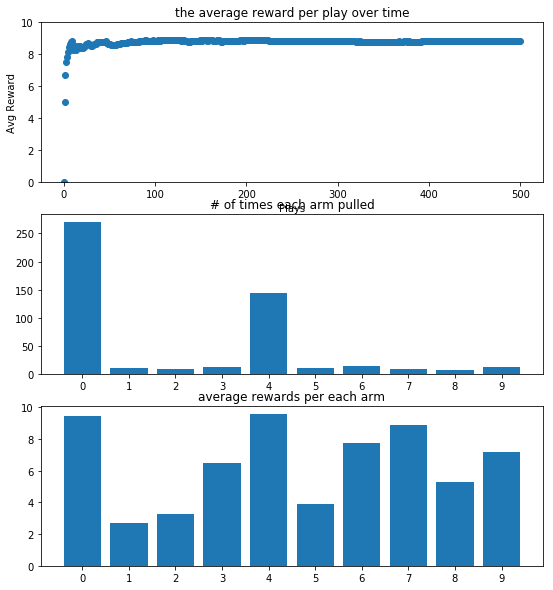

In [13]:
fig,ax = plt.subplots(3,1)
ax[0].set_xlabel("Plays")
ax[0].set_ylabel("Avg Reward")
fig.set_size_inches(9,10)

n = 10
record = np.zeros((n, 2))
probs = np.random.rand(n)
eps = 0.2     # e-greedy exploration param
rewards = [0]

for i in range(500):
    if random.random() > eps:
        choice = get_best_arm(record)   # exploit: choose the best arm
    else:  # or explore
        choice = np.random.randint(10)
    r = get_reward(probs[choice])                  # computes the reward for choosing the arm
    record = update_record(record,choice,r)        # updates the record
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)  # tracks the running average of rewards
    rewards.append(mean_reward)
ax[0].scatter(np.arange(len(rewards)),rewards)
ax[0].set_ylim(0, 10)

ax[1].bar([str(x) for x in range(n)], record[:,0])
ax[2].bar([str(x) for x in range(n)], record[:,1])

ax[0].set_title("the average reward per play over time")
ax[1].set_title("# of times each arm pulled")
ax[2].set_title("average rewards per each arm")
print(probs)  # probability of getting reward (+1) per each arm
print(record)

##### Listing 2.6

## Softmax selection policy
- Listing 2.9

In [14]:
# using softmax policy instead of e-greedy: use probability distribution of options
def softmax(av, tau=1.12):
    softm = ( np.exp(av / tau) / np.sum( np.exp(av / tau) ) )
    return softm

In [15]:
probs = np.random.rand(n)
record = np.zeros((n,2))

In [16]:
softmax(record[:,1], tau=0.7)

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

[0.35320931 0.066333   0.52092584 0.84168272 0.15853243 0.31609855
 0.4093322  0.24026736 0.23035127 0.53403279]
[[  6.           4.16666667]
 [  0.           0.        ]
 [ 15.           5.2       ]
 [470.           8.34468085]
 [  0.           0.        ]
 [  0.           0.        ]
 [  5.           3.4       ]
 [  0.           0.        ]
 [  4.           2.25      ]
 [  0.           0.        ]]


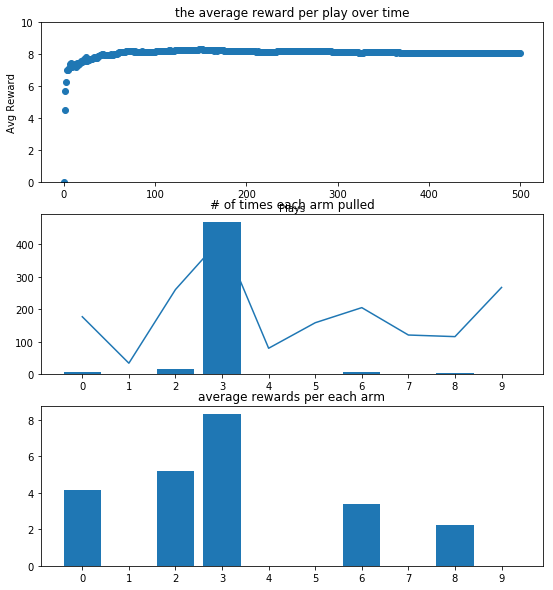

In [17]:
fig,ax = plt.subplots(3,1)
ax[0].set_xlabel("Plays")
ax[0].set_ylabel("Avg Reward")
fig.set_size_inches(9,10)

n = 10
record = np.zeros((n, 2))
probs = np.random.rand(n)

rewards = [0]
no_iter = 500

for i in range(no_iter):
    p = softmax(record[:,1],tau=1.2)
#     print(p)
    choice = np.random.choice(np.arange(n),p=p)
    r = get_reward(probs[choice])
    record = update_record(record,choice,r)
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)
    rewards.append(mean_reward)

ax[0].scatter(np.arange(len(rewards)),rewards)
ax[0].set_ylim(0, 10)

ax[0].set_title("the average reward per play over time")
ax[1].set_title("# of times each arm pulled")
ax[2].set_title("average rewards per each arm")

ax[1].bar([str(x) for x in range(n)], record[:,0])
ax[1].plot([str(x) for x in range(n)], probs*no_iter) # reward probability; if ideal = them algorithm should select an arm with higher reward prob. 
ax[2].bar([str(x) for x in range(n)], record[:,1])

print(probs)  # probability of getting reward (+1) per each arm
print(record)

## Contextual bandints

### PyTorch quick intro 

- PyTorch is very similar to numpy

In [18]:
np.array([[1,2,3], [4,5,6]])

array([[1, 2, 3],
       [4, 5, 6]])

In [19]:
import torch

In [23]:
torch.Tensor([[1,2,3], [4,5,6]])

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.]])

#### Automatic differentiation

In [30]:
x = torch.Tensor([2, 4])  # input data
m = torch.randn(2, requires_grad=True)  # parameter 1; compute gradient
b = torch.randn(1, requires_grad=True)  # parameter 2; compute gradient
y = m * x + b  # linear model

In [31]:
_y_known = torch.Tensor([0, 1])
loss = (torch.sum(_y_known - y))**2. # loss function; sum of squred error
loss.backward()   # calculate gradients

In [33]:
(y, _y_known, loss)

(tensor([ 2.3659, -4.3803]), tensor([ 0.,  1.]), tensor(9.0869))

In [34]:
m.grad

tensor([-12.0578, -24.1156])

#### building models

##### simple example

In [40]:
# model setting
model = torch.nn.Sequential(
    torch.nn.Linear(10, 150),
    torch.nn.ReLU(),
    torch.nn.Linear(150, 4),
    torch.nn.ReLU(),
)

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [41]:
(model, loss_fn, optimizer)

(Sequential(
   (0): Linear(in_features=10, out_features=150, bias=True)
   (1): ReLU()
   (2): Linear(in_features=150, out_features=4, bias=True)
   (3): ReLU()
 ), MSELoss(), Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     eps: 1e-08
     lr: 0.01
     weight_decay: 0
 ))

In [44]:
# ## example training loop
# for step in range(100):
#     y_pred = model(x)          # make prediction
#     loss = loss_fn(y_pred, y)  # calculate the loss
#     optimizer.zero_grad()      
#     loss.backward()            # compute the gradients
#     optimizer.step()           # run a single step of gradient descent

##### little more complex model

In [45]:
from torch.nn import Module, Linear

class MyNet(Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = Linear(784, 50)
        self.fc2 = Linear(50, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x

model = MyNet()

## Contextual bandits - solving 

In [57]:
# setting up the environment 
class ContextBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.init_distribution(arms)
        self.update_state()
        
    def init_distribution(self, arms):
        # Num states = Num Arms to keep things simple
        self.bandit_matrix = np.random.rand(arms,arms)
        #each row represents a state, each column an arm
        
    def reward(self, prob):
        reward = 0
        for i in range(self.arms):
            if random.random() < prob:
                reward += 1
        return reward
        
    def get_state(self):
        return self.state
    
    def update_state(self):
        self.state = np.random.randint(0,self.arms)
        
    def get_reward(self,arm):
        return self.reward(self.bandit_matrix[self.get_state()][arm])
        
    def choose_arm(self, arm):
        reward = self.get_reward(arm)
        self.update_state()
        return reward

In [47]:
import numpy as np
import torch

arms = 10
N, D_in, H, D_out = 1, arms, 100, arms

In [59]:
env = ContextBandit(arms=10)
state = env.get_state()
reward = env.choose_arm(1)
print(state, reward)

3 6


In [49]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.ReLU(),
)

In [50]:
loss_fn = torch.nn.MSELoss()

In [51]:
env = ContextBandit(arms)

In [52]:
def one_hot(N, pos, val=1):
    one_hot_vec = np.zeros(N)
    one_hot_vec[pos] = val
    return one_hot_vec

In [53]:
def running_mean(x,N=50):
    c = x.shape[0] - N
    y = np.zeros(c)
    conv = np.ones(N)
    for i in range(c):
        y[i] = (x[i:i+N] @ conv)/N
    return y

In [54]:
def train(env, epochs=5000, learning_rate=1e-2):
    cur_state = torch.Tensor(one_hot(arms,env.get_state())) # gets current state of the environment
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    rewards = []
    for i in range(epochs):
        y_pred = model(cur_state) # runs nn forward to get reward prediction
        av_softmax = softmax(y_pred.data.numpy(), tau=2.0) # converts reward to probability distribution softmax
        av_softmax /= av_softmax.sum() # normalizes distribution (sum=1)
        choice = np.random.choice(arms, p=av_softmax) # choose new action probabilistically
        cur_reward = env.choose_arm(choice) # takes action/receives reward
        one_hot_reward = y_pred.data.numpy().copy() # torch tensor -> numpy array
        one_hot_reward[choice] = cur_reward # update
        reward = torch.Tensor(one_hot_reward)
        rewards.append(cur_reward)
        loss = loss_fn(y_pred, reward)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        cur_state = torch.Tensor(one_hot(arms,env.get_state())) # updates current env state
    return np.array(rewards)

In [55]:
rewards = train(env)

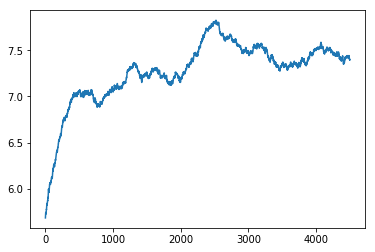

In [56]:
plt.plot(running_mean(rewards,N=500))